## EDA Analaysis on Mental Health data for key data insights & applying simple Machine leanring algorithms such as K-means, Regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from datetime import datetime as dt
import statsmodels.api as sm
from patsy import dmatrices
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df = pd.read_csv('mxmh_survey_results.csv', parse_dates=True)
pd.set_option('display.max_columns', None)
df.drop('Permissions', axis=1, inplace=True)
df.iloc[:5,:]

,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,BPM,Frequency [Classical],Frequency [Country],Frequency [EDM],Frequency [Folk],Frequency [Gospel],Frequency [Hip hop],Frequency [Jazz],Frequency [K pop],Frequency [Latin],Frequency [Lofi],Frequency [Metal],Frequency [Pop],Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects
0,8/27/2022 19:29:02,18.0,Spotify,3.0,Yes,Yes,Yes,Latin,Yes,Yes,156.0,Rarely,Never,Rarely,Never,Never,Sometimes,Never,Very frequently,Very frequently,Rarely,Never,Very frequently,Sometimes,Very frequently,Never,Sometimes,3.0,0.0,1.0,0.0,NaN
1,8/27/2022 19:57:31,63.0,Pandora,1.5,Yes,No,No,Rock,Yes,No,119.0,Sometimes,Never,Never,Rarely,Sometimes,Rarely,Very frequently,Rarely,Sometimes,Rarely,Never,Sometimes,Sometimes,Rarely,Very frequently,Rarely,7.0,2.0,2.0,1.0,NaN
2,8/27/2022 21:28:18,18.0,Spotify,4.0,No,No,No,Video game music,No,Yes,132.0,Never,Never,Very frequently,Never,Never,Rarely,Rarely,Very frequently,Never,Sometimes,Sometimes,Rarely,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect
3,8/27/2022 21:40:40,61.0,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,84.0,Sometimes,Never,Never,Rarely,Sometimes,Never,Very frequently,Sometimes,Very frequently,Sometimes,Never,Sometimes,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve
4,8/27/2022 21:54:47,18.0,Spotify,4.0,Yes,No,No,R&B,Yes,No,107.0,Never,Never,Rarely,Never,Rarely,Very frequently,Never,Very frequently,Sometimes,Sometimes,Never,Sometimes,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve


# Exploratory data analysis

## Data statistics

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 736 entries, 0 to 735
Data columns (total 32 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Timestamp                     736 non-null    object 
 1   Age                           735 non-null    float64
 2   Primary streaming service     735 non-null    object 
 3   Hours per day                 736 non-null    float64
 4   While working                 733 non-null    object 
 5   Instrumentalist               732 non-null    object 
 6   Composer                      735 non-null    object 
 7   Fav genre                     736 non-null    object 
 8   Exploratory                   736 non-null    object 
 9   Foreign languages             732 non-null    object 
 10  BPM                           629 non-null    float64
 11  Frequency [Classical]         736 non-null    object 
 12  Frequency [Country]           736 non-null    object 
 13  Frequ

<p style="font-family: Arial; color:blue;">There are 736 rows with Object & float datatypes. There are null values in the dataset

In [4]:
df.describe()

,Age,Hours per day,BPM,Anxiety,Depression,Insomnia,OCD
count,735.000000,736.000000,6.290000e+02,736.000000,736.000000,736.000000,736.000000
mean,25.206803,3.572758,1.589948e+06,5.837636,4.796196,3.738451,2.637228
std,12.054970,3.028199,3.987261e+07,2.793054,3.028870,3.088689,2.842017
min,10.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,18.000000,2.000000,1.000000e+02,4.000000,2.000000,1.000000,0.000000
50%,21.000000,3.000000,1.200000e+02,6.000000,5.000000,3.000000,2.000000
75%,28.000000,5.000000,1.440000e+02,8.000000,7.000000,6.000000,5.000000
max,89.000000,24.000000,1.000000e+09,10.000000,10.000000,10.000000,10.000000


<p style="font-family: Arial; color:blue;">We have respondant from min age of 10 to max age of 89. Anxiety, Depression, Insomnia,OCD are measured on a scale of 1 to 10. Additionally, respondants listen to an avg. 3.5 hours per day

In [5]:
#removing the scientific notation from BPM
df.describe()['BPM'].apply(lambda x: '%.3f' % x)

count          629.000
mean       1589948.345
std       39872606.180
min              0.000
25%            100.000
50%            120.000
75%            144.000
max      999999999.000
Name: BPM, dtype: object

<p style="font-family: Arial; color:blue;">There is one BPM value which is 999999999, one is 624 (very high) and 3 zero values (as per google, the an extremely slowest song would have a 20-40 BPM), which is most likly an error. 

In [3]:
#Filling outlier values in BPM

avg_BPM_16 = df[(df['Age']==16) & (df['BPM']!=999999999)].groupby('Age')['BPM'].mean()
df.loc[df['BPM']==999999999, 'BPM']= int(avg_BPM_16)

#There is another BPM=624 at Age=16 which is rather high and outlier, replacing this with avg BPM of that age group
df.loc[df['BPM']==624, 'BPM']= int(avg_BPM_16)

#There are 3 zeros BPMs replacing this with avg BPM 
df.loc[df['BPM']==0, 'BPM']= df['BPM'].mean()

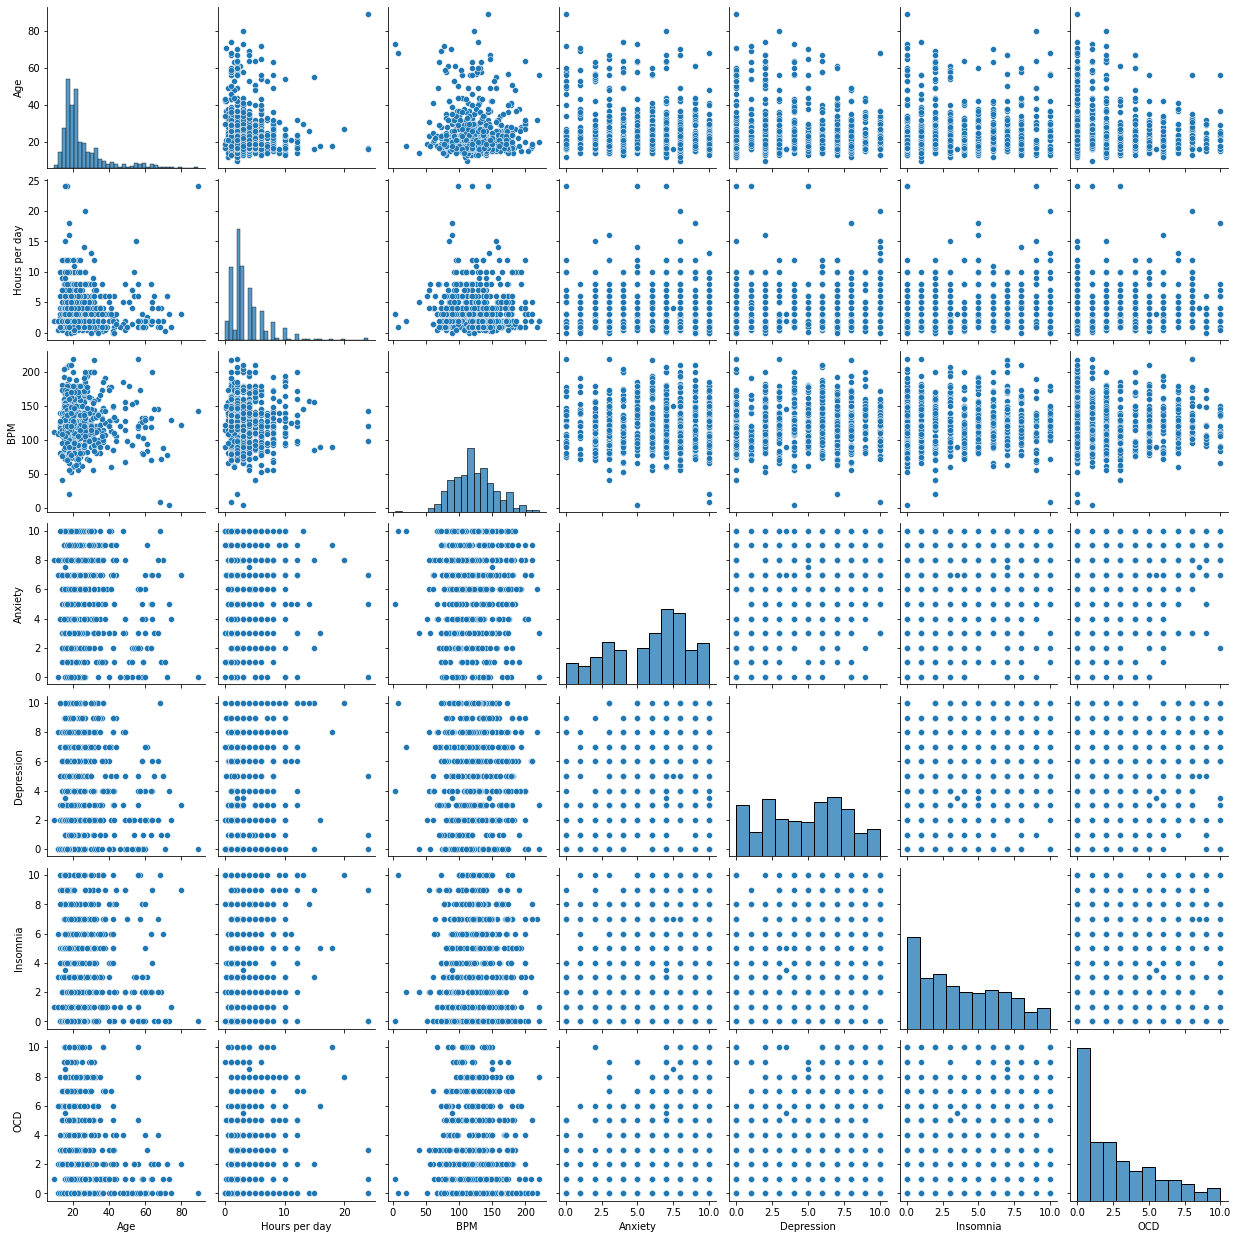

In [7]:
# Seeing the distribution of data
sns.pairplot(df.select_dtypes(include=['float64']))

We have more young people in our data set compared to older people. BPM is normally distrubuted. Anxiety & Depression are rated uniformly across the scale, where Insomnia and OCD have less highe values on the scale. We have outlier values across BPM and Hours/day column

## Feature Handling - Outliers, Null, Duplicates

In [8]:
#checking for duplicates
df.duplicated().sum()

0

<p style="font-family: Arial; color:blue;">There are no duplicates in the dataset

<AxesSubplot:>

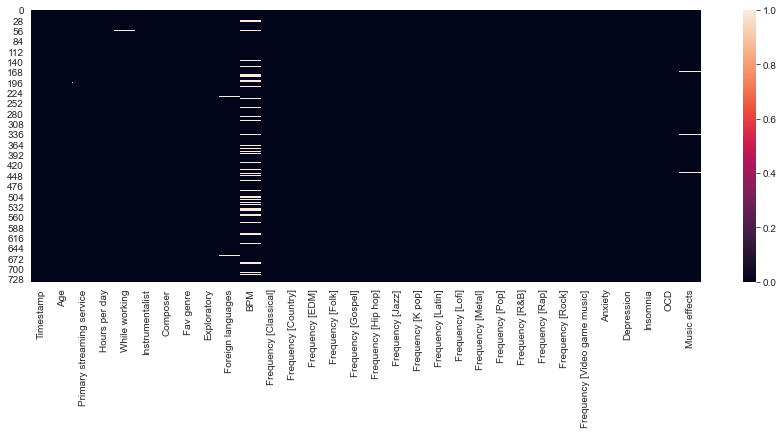

In [9]:
# Head map for the null values
plt.figure(figsize=(15,5))
sns.set_style('darkgrid')
sns.heatmap(df.isna())

<p style="font-family: Arial; color:blue;"> We have 120 null values mostly in BPM column. Also we have 8 null values for Music effect, which we will keep as it is as and will predict the classification values for these NAN values as new data

In [10]:
#Looking at all the columns with atlest one null value
df[df.isna().any(axis=1)]

,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,BPM,Frequency [Classical],Frequency [Country],Frequency [EDM],Frequency [Folk],Frequency [Gospel],Frequency [Hip hop],Frequency [Jazz],Frequency [K pop],Frequency [Latin],Frequency [Lofi],Frequency [Metal],Frequency [Pop],Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects
0,8/27/2022 19:29:02,18.0,Spotify,3.0,Yes,Yes,Yes,Latin,Yes,Yes,156.0,Rarely,Never,Rarely,Never,Never,Sometimes,Never,Very frequently,Very frequently,Rarely,Never,Very frequently,Sometimes,Very frequently,Never,Sometimes,3.0,0.0,1.0,0.0,NaN
1,8/27/2022 19:57:31,63.0,Pandora,1.5,Yes,No,No,Rock,Yes,No,119.0,Sometimes,Never,Never,Rarely,Sometimes,Rarely,Very frequently,Rarely,Sometimes,Rarely,Never,Sometimes,Sometimes,Rarely,Very frequently,Rarely,7.0,2.0,2.0,1.0,NaN
10,8/27/2022 22:51:15,18.0,Spotify,3.0,Yes,Yes,No,Country,Yes,No,NaN,Never,Very frequently,Never,Never,Never,Never,Never,Never,Never,Never,Never,Rarely,Rarely,Never,Rarely,Never,7.0,7.0,4.0,7.0,No effect
12,8/27/2022 23:04:00,NaN,Spotify,3.0,Yes,No,No,Hip hop,Yes,Yes,NaN,Rarely,Never,Rarely,Never,Never,Very frequently,Never,Sometimes,Never,Very frequently,Never,Sometimes,Sometimes,Rarely,Rarely,Never,9.0,3.0,2.0,7.0,Improve
15,8/27/2022 23:19:52,17.0,Spotify,2.0,No,No,No,Pop,Yes,Yes,NaN,Rarely,Rarely,Never,Never,Never,Sometimes,Rarely,Rarely,Rarely,Rarely,Rarely,Very frequently,Rarely,Sometimes,Sometimes,Rarely,7.0,5.0,4.0,1.0,Worsen
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
688,9/24/2022 0:42:39,18.0,Spotify,4.0,Yes,No,No,R&B,No,No,NaN,Never,Rarely,Never,Never,Never,Very frequently,Never,Never,Never,Very frequently,Never,Sometimes,Very frequently,Sometimes,Never,Never,8.0,0.0,0.0,2.0,No effect
700,10/3/2022 10:00:01,20.0,YouTube Music,1.0,Yes,No,No,Pop,No,Yes,NaN,Sometimes,Rarely,Rarely,Rarely,Rarely,Sometimes,Rarely,Never,Never,Rarely,Rarely,Very frequently,Rarely,Sometimes,Rarely,Very frequently,8.0,9.0,6.0,5.0,Worsen
706,10/3/2022 15:38:19,23.0,Spotify,1.0,Yes,Yes,No,Rock,Yes,Yes,NaN,Rarely,Rarely,Sometimes,Sometimes,Never,Sometimes,Rarely,Rarely,Never,Sometimes,Sometimes,Very frequently,Sometimes,Sometimes,Very frequently,Very frequently,8.0,6.0,1.0,4.0,Improve
712,10/4/2022 8:53:39,23.0,I do not use a streaming service.,3.0,Yes,No,No,Rock,No,No,NaN,Never,Never,Never,Rarely,Never,Never,Sometimes,Never,Never,Rarely,Never,Sometimes,Rarely,Never,Very frequently,Never,10.0,5.0,2.0,0.0,Improve


Before filling the null values in BPM, we will analyse the effect of Tempo of music (BPM) with age & fav genre to fill in the appropriate null values

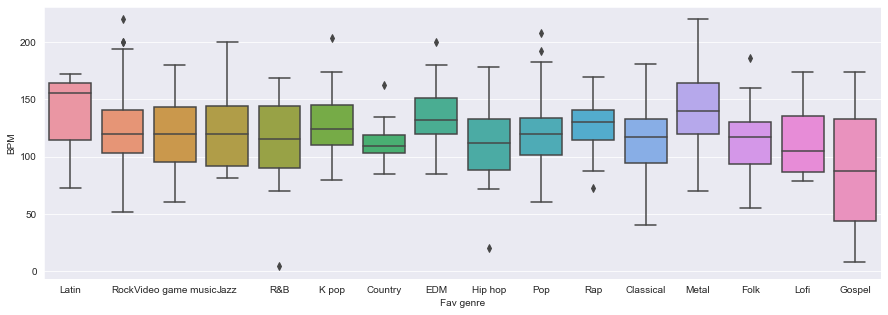

In [11]:
plt.figure(figsize=(15,5))
sns.set_style('darkgrid')
sns.boxplot(data=df, y='BPM', x='Fav genre')
plt.show()

<p style="font-family: Arial; color:blue;">Tempo of music(BPM) is similar across all genre. Median BPM of most music genre is <150 BPM, it ranges from 50 to 180 BPM

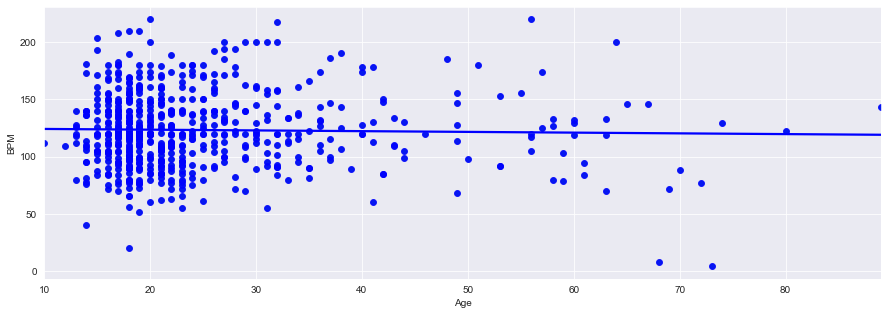

In [12]:
plt.figure(figsize=(15,5))
sns.scatterplot(data=df, y='BPM', x='Age')
sns.set_style('darkgrid')
sns.regplot(data=df, y='BPM', x='Age',ci=0,color='blue')
plt.show()

<p style="font-family: Arial; color:blue;">All age group listen to similar tempo of music (BPM) as all genre have similar tempo 

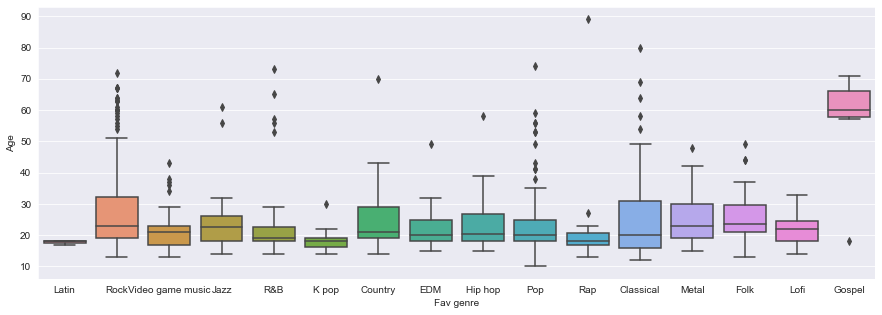

In [13]:
plt.figure(figsize=(15,5))
sns.set_style('darkgrid')
sns.boxplot(data=df, y='Age', x='Fav genre')
plt.show()

<p style="font-family: Arial; color:blue;">Latin, Rap,K-pop.Lofi is listened only by younger age group and Gospel is at older age-group

# Cleaning & filling the Null & outliers

There is not much difference of age with BPM vs genre with BPM so we can fill the null values with the avg BPM in that age group or avg. BPM in the Fav Genre group or overall avg. BPM. In our case, we are using the avg. BPM in that age group

In [4]:
# filling one missing age with the avg age who listens to the same music genre

df['Age']= df['Age'].fillna(df.groupby('Fav genre')['Age'].transform('mean'))

#filling null values with the avg. BPM in that same age group
df['BPM']= df['BPM'].fillna(df.groupby('Age')['BPM'].transform('mean'))

#filling one null value by backfilling
df['Primary streaming service']= df['Primary streaming service'].fillna(method="bfill")

#filling one null value by backfilling
df['While working']=df['While working'].fillna(method="bfill")

#dropping rows with more than 2 NANs in a row
df.dropna(thresh=df.shape[1]-3, axis=0, inplace= True)

#replace NAN in intrumentalists with na string
df['Instrumentalist']=df['Instrumentalist'].fillna('na')
#replace NAN in forign lang with na string 
df['Foreign languages']=df['Foreign languages'].fillna('na')

# Fill NA in BPM with next closest age BPM value
df.set_index('Age',inplace= True)
mean_shifted= df.groupby(df.index)['BPM'].mean().shift(1)
df['BPM']= df['BPM'].fillna(mean_shifted)
df.reset_index(inplace=True)

## Visualising the data

### % of people using the different streaming srvices. Which one is the most popular?

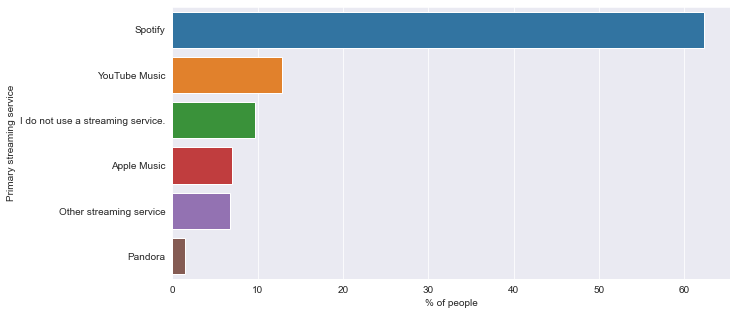

In [9]:
plt.figure(figsize=(10,5))
sns.set_style('darkgrid')
data= ((df['Primary streaming service'].value_counts()/df['Primary streaming service'].count())*100).round(2)
ax =sns.barplot(y=data.index , x = data.values)
ax.set(ylabel='Primary streaming service', xlabel='% of people')
plt.show()

<p style="font-family: Arial; color:blue;">Spotify is the most common streaming services used </p>

### Which streaming services are used across age groups?

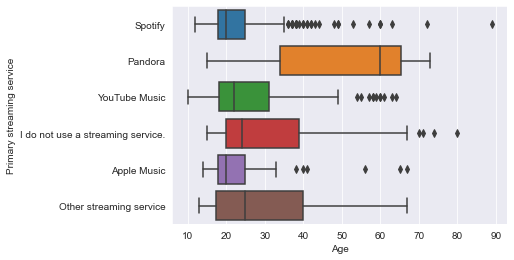

In [16]:
sns.set_style('darkgrid')
sns.boxplot(data=df, y='Primary streaming service', x='Age')
plt.show()

 <p style="font-family: Arial; color:blue;"> Spotify & apple music is popular among young people,however it is used across all age groups**. Pandora is most common in higher age groups. Overall all streaming servives are being used across all age groups </p>
 
 **As we have high distribution of young age in our data-set, we have higher density in young age group, however outliers suggest that it's been used across all age-groups as well

### Which days do most people listen music to?

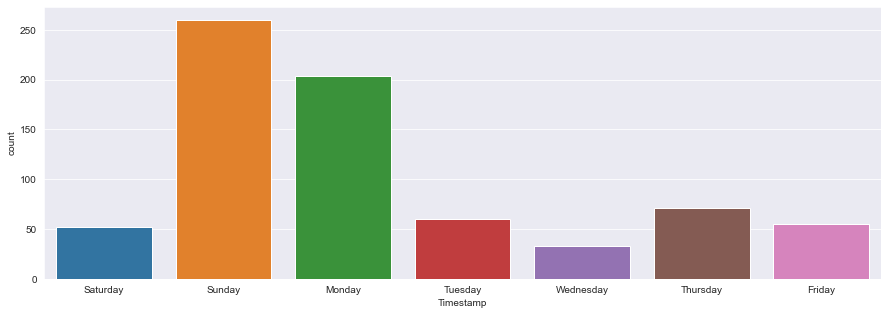

In [8]:
plt.figure(figsize=(15,5))
sns.set_style('darkgrid')
df['Timestamp']=pd.to_datetime(df['Timestamp'])
day_name= df['Timestamp'].dt.day_name()
sns.countplot(day_name)
plt.show()

<p style="font-family: Arial; color:blue;"> Most people listen to music on Sunday and least on Wednesday </p>

### Which Genre is most frequently listened to and which is least?

<Figure size 720x360 with 0 Axes>

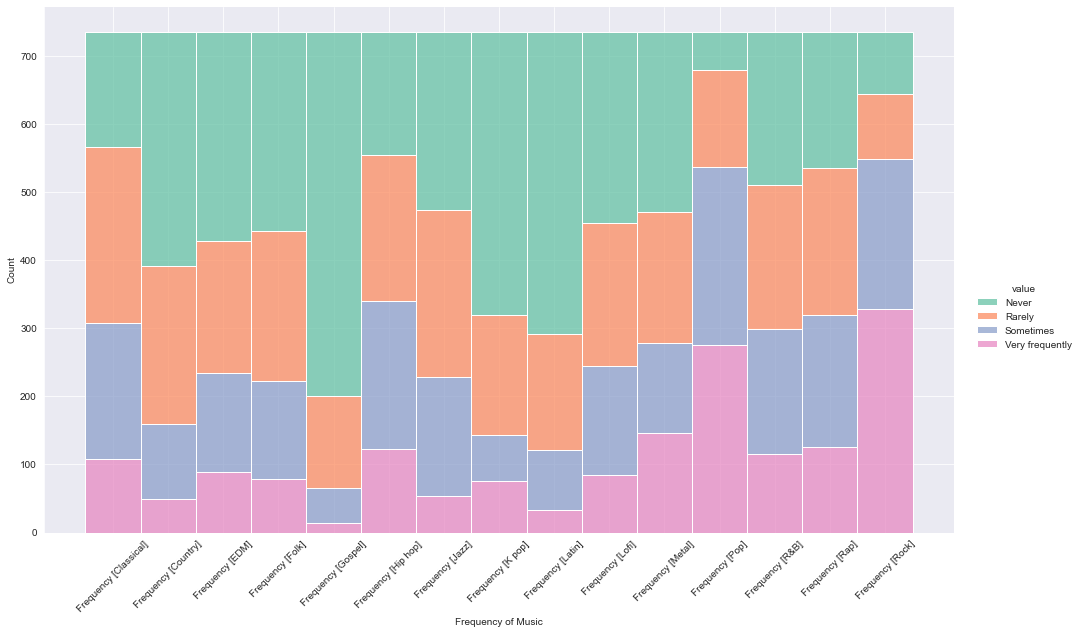

In [18]:
plt.figure(figsize=(10,5))
sns.set_style('darkgrid')
sns.displot(pd.melt(df.iloc[:,11:26]), x='variable',hue='value',multiple='stack',
             height=8, aspect=1.7,hue_order=['Never','Rarely','Sometimes','Very frequently'],palette='Set2')
plt.xticks(rotation=45)
plt.xlabel("Frequency of Music")
plt.show()

<p style="font-family: Arial; color:blue;">Repondants listened to Rock & Pop very frequently. Majority of respondants never listen to Gospel.

### Are younger people spending more time listening to music compared to elder people?

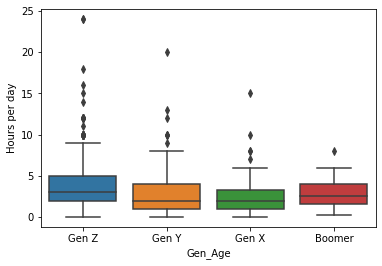

In [5]:
df['Gen_Age'] = pd.cut(df['Age'], [0,26,42,61,80], labels=['Gen Z','Gen Y','Gen X','Boomer'])
sns.boxplot(data=df,x='Gen_Age',y='Hours per day')
plt.show()

<p style="font-family: Arial; color:blue;">Yes, younger people spend more time listening to music compared to older people

### People who listen to music while working are more exploratory compared to people who don't listen to music while working?

In [6]:
df[['While working','Exploratory']].groupby(['While working','Exploratory']).size().reset_index().pivot(columns='While working',index='Exploratory',values=0)

While working,No,Yes
Exploratory,,
No,63,148
Yes,91,433


<p style="font-family: Arial; color:blue;">We have found that majority of people who listen to music while working also explore new music

### Which genre is related to high mental health index (Anxiety,Depression,..)?

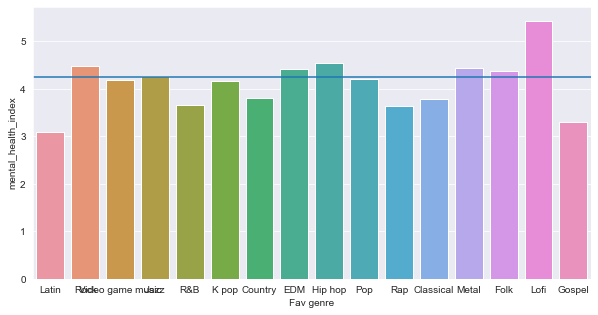

In [15]:
plt.figure(figsize=(10,5))
sns.set_style('darkgrid')
ax=sns.barplot(data=df,x='Fav genre',y='mental_health_index',ci=0)
df['mental_health_index'] = (df['Anxiety']+df['Depression']+df['Insomnia']+df['OCD'])/4
mental_health_index_mean=df['mental_health_index'].mean()
ax.axhline(y=mental_health_index_mean) #Mean mental health index 
plt.show()

Interpretation- Asn the nental health index for Rock,EDM,Hop-hop,Metal,Folk,Lofi is above the avg.mental health index, they are related to high anxiety/depression/OCD/Insomnia

### Which genre has negative music effect on mental health ?

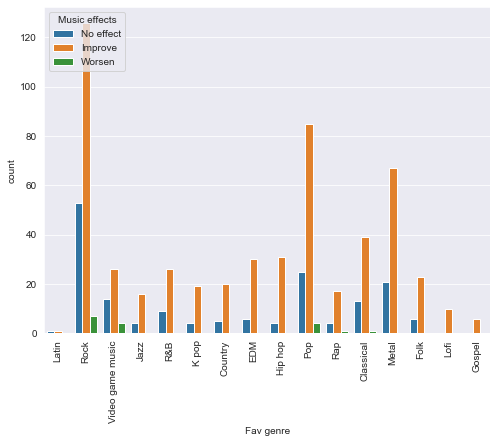

In [16]:
plt.figure(figsize=(8,6))
sns.countplot(x=df['Fav genre'], hue=df['Music effects'])
plt.xticks(rotation=90)
plt.show()

- Listening to rock, video game music, pop, Rap and Classical can have negative music effect on mental health

### Visualizing co-relations between different features

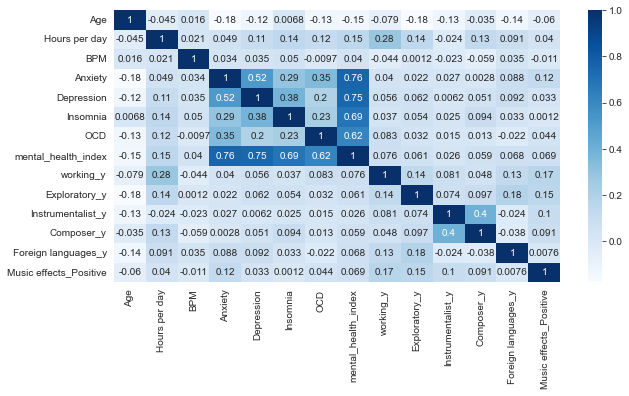

In [17]:
df['working_y']= df['While working'].apply(lambda x: 1 if x =='Yes' else 0)
df['Exploratory_y']= df['Exploratory'].apply(lambda x: 1 if x=='Yes' else 0)
df['Instrumentalist_y']= df['Instrumentalist'].apply(lambda x: 1 if x=='Yes' else 0)
df['Composer_y']= df['Composer'].apply(lambda x: 1 if x=='Yes' else 0)
df['Foreign languages_y']= df['Foreign languages'].apply(lambda x: 1 if x=='Yes' else 0)


#Excluding the dataset with NAN Music effects values
df['Music effects_Positive']= df[df['Music effects'].notna()]['Music effects'].apply(lambda x: 1 if x=='Improve' else 0)
# Correlation between all columns except frequency of music
plt.figure(figsize=(10,5))
sns.set_style('darkgrid')
corr = df.corr()
sns.set_style('darkgrid')
sns.heatmap(corr, cmap="Blues", annot=True)
plt.show()



 - There is a positive co-relation between BPM(tempo of the music) and Anxiety, Depression
 - There is a positive co relation between people who listen to music while working and the no. of hours spend on music
 - There is a positive co-relation between no. of hours spend on music and Insomnia
 - There is a positive corelation between people who listen to music while working and exploring new music 
 - There is a positive co-relation bewttn people who play an instrument and people who compose music
-  There is a negative coorelation between Age and Anxiety,depression,Insomnia, BPM

In [ ]:
#corelation between music genre and Music effect positive & mental health index

In [18]:
df['Frequency [Classical]_y']= df['Frequency [Classical]'].apply(lambda x: 1 if x in ['Very frequently', 'Sometimes'] else 0)
df['Frequency [Country]_y']= df['Frequency [Country]'].apply(lambda x: 1 if x in ['Very frequently', 'Sometimes'] else 0)
df['Frequency [EDM]_y']= df['Frequency [EDM]'].apply(lambda x: 1 if x in ['Very frequently', 'Sometimes'] else 0)
df['Frequency [Folk]_y']= df['Frequency [Folk]'].apply(lambda x: 1 if x in ['Very frequently', 'Sometimes'] else 0)
df['Frequency [Gospel]_y']= df['Frequency [Gospel]'].apply(lambda x: 1 if x in ['Very frequently', 'Sometimes'] else 0)
df['Frequency [Hip hop]_y']= df['Frequency [Hip hop]'].apply(lambda x: 1 if x in ['Very frequently', 'Sometimes'] else 0)
df['Frequency [Jazz]_y']= df['Frequency [Jazz]'].apply(lambda x: 1 if x in ['Very frequently', 'Sometimes'] else 0)
df['Frequency [K pop]_y']= df['Frequency [K pop]'].apply(lambda x: 1 if x in ['Very frequently', 'Sometimes'] else 0)
df['Frequency [Latin]_y']= df['Frequency [Latin]'].apply(lambda x: 1 if x in ['Very frequently', 'Sometimes'] else 0)
df['Frequency [Lofi]_y']= df['Frequency [Lofi]'].apply(lambda x: 1 if x in ['Very frequently', 'Sometimes'] else 0)
df['Frequency [Metal]_y']= df['Frequency [Metal]'].apply(lambda x: 1 if x in ['Very frequently', 'Sometimes'] else 0)
df['Frequency [Frequency [Pop]_y']= df['Frequency [Pop]'].apply(lambda x: 1 if x in ['Very frequently', 'Sometimes'] else 0)
df['Frequency [R&B]_y']= df['Frequency [R&B]'].apply(lambda x: 1 if x in ['Very frequently', 'Sometimes'] else 0)
df['Frequency [Rock]_y']= df['Frequency [Rock]'].apply(lambda x: 1 if x in ['Very frequently', 'Sometimes'] else 0)
df['Frequency [Video game music]_y']= df['Frequency [Video game music]'].apply(lambda x: 1 if x in ['Very frequently', 'Sometimes'] else 0)


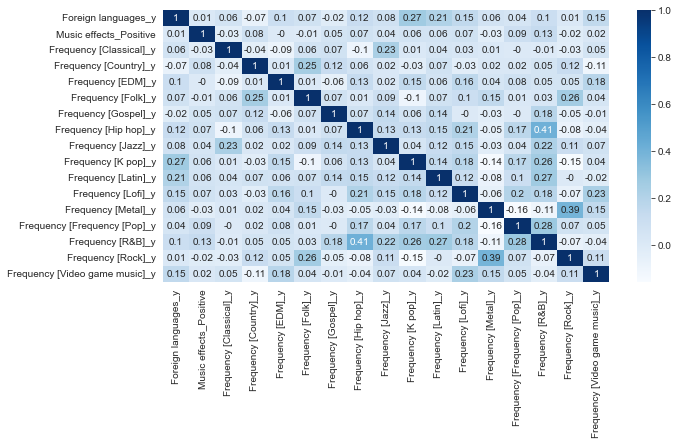

In [19]:
# Correlation between all columns
plt.figure(figsize=(10,5))
sns.set_style('darkgrid')
sns.set_style('darkgrid')
sns.heatmap(round(df.iloc[:,-17:].corr(),2), cmap="Blues", annot=True)
plt.show()

- Metal,Rock,EDM,Folk, Classical has negative co-relation with positive music effect
- All other music genre have postive co relation with positive music effect

#### Hypothesis 1: Increased BPM (tempo) of music increases anxiety,depression,Insomnia 

#### Hypothesis 2:  Anxiety,depression,Insomnia decreases with age

#### Hypothesis 3: Higher the mental health index (high anxiety, depression) more you will feel listening positive effects of music on mental health

#### Hypothesis 4: Increased no. of hours increases anxiety,depression,Insomnia

#### Hypothesis 5:  Listening to music  has the positive effect on mental health

## Hypothesis testing

### Hypothesis 1: Increased BPM (tempo) of music increases anxiety,depression,Insomnia 

In [20]:
y, X = dmatrices("mental_health_index ~ BPM ",
                 data=df[df['Music effects'].notna()], return_type='dataframe')
model = sm.OLS(y, X)
result = model.fit()
print(result.summary())

                             OLS Regression Results                            
Dep. Variable:     mental_health_index   R-squared:                       0.002
Model:                             OLS   Adj. R-squared:                  0.000
Method:                  Least Squares   F-statistic:                     1.339
Date:                 Sun, 06 Aug 2023   Prob (F-statistic):              0.248
Time:                         16:16:52   Log-Likelihood:                -1558.6
No. Observations:                  728   AIC:                             3121.
Df Residuals:                      726   BIC:                             3130.
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.9103      0.314     12.44

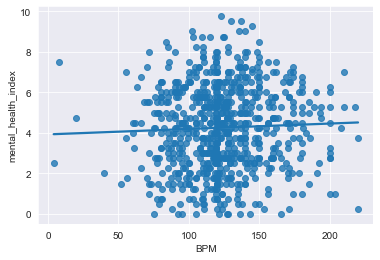

In [21]:
sns.regplot(data=df,x='BPM',y='mental_health_index',ci=0)
plt.show()

Interpretation:

- Since p value is >0.05, relationship between Tempo of the music(BPM) and mental_health_index is not significant.
-Increased Tempo of the music (BPM) has no effect on  Anxiety+Depression+Insomnia+OCD score

### Hypothesis 2:  Anxiety,depression,Insomnia decreases with age

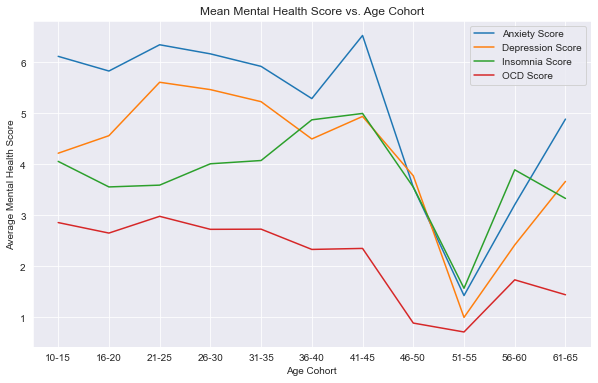

In [22]:
#Mean meantal health score vs age - age cohorts broken up by every 5th year
cohort_df = df.copy()
cohort_df['bins'] = pd.cut(x=df['Age'],
                           bins=[9, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65],
                          labels = ['10-15', '16-20', '21-25', '26-30', '31-35',
                                    '36-40', '41-45', '46-50', '51-55', '56-60', '61-65'])

mental_df = cohort_df.groupby('bins')[['Anxiety', 'Insomnia', 'Depression', 'OCD']].agg('mean') 
mental_df

x_axis = mental_df.index
anxiety_average = mental_df['Anxiety']
depression_average = mental_df['Depression']
insomnia_average = mental_df['Insomnia']
ocd_average = mental_df['OCD']

plt.figure(figsize=(10, 6))
plt.plot(x_axis, anxiety_average, label='Anxiety Score')
plt.plot(x_axis, depression_average, label='Depression Score')
plt.plot(x_axis, insomnia_average, label='Insomnia Score')
plt.plot(x_axis, ocd_average, label= 'OCD Score')

# Adding labels and title
plt.xlabel('Age Cohort')
plt.ylabel('Average Mental Health Score')
plt.title('Mean Mental Health Score vs. Age Cohort')
plt.legend()

# Display the plot
plt.grid(True)
plt.show()

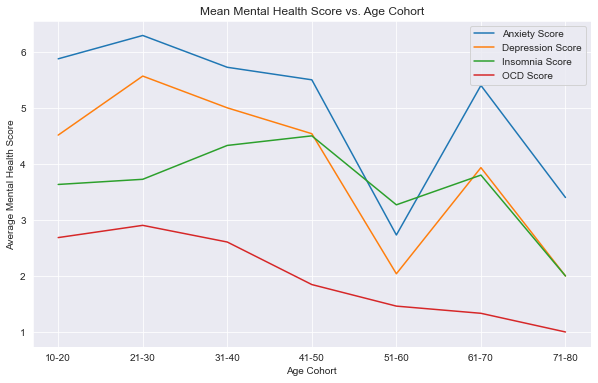

In [23]:
#Mean meantal health score vs age - age cohorts broken up by every 10th year
cohort_df = df.copy()
cohort_df['bins'] = pd.cut(x=df['Age'],
                           bins=[9, 20, 30, 40, 50, 60, 70, 80],
                          labels = ['10-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80'])

mental_df = cohort_df.groupby('bins')[['Anxiety', 'Insomnia', 'Depression', 'OCD']].agg('mean') 
mental_df

x_axis = mental_df.index
anxiety_average = mental_df['Anxiety']
depression_average = mental_df['Depression']
insomnia_average = mental_df['Insomnia']
ocd_average = mental_df['OCD']

plt.figure(figsize=(10, 6))
plt.plot(x_axis, anxiety_average, label='Anxiety Score')
plt.plot(x_axis, depression_average, label='Depression Score')
plt.plot(x_axis, insomnia_average, label='Insomnia Score')
plt.plot(x_axis, ocd_average, label= 'OCD Score')

# Adding labels and title
plt.xlabel('Age Cohort')
plt.ylabel('Average Mental Health Score')
plt.title('Mean Mental Health Score vs. Age Cohort')
plt.legend()

# Display the plot
plt.grid(True)
plt.show()

In [24]:
y, X = dmatrices("mental_health_index ~ Age ",
                 data=df[df['Music effects'].notna()], return_type='dataframe')
model = sm.OLS(y, X)
result = model.fit()
print(result.summary())

                             OLS Regression Results                            
Dep. Variable:     mental_health_index   R-squared:                       0.021
Model:                             OLS   Adj. R-squared:                  0.020
Method:                  Least Squares   F-statistic:                     15.50
Date:                 Sun, 06 Aug 2023   Prob (F-statistic):           9.03e-05
Time:                         16:17:12   Log-Likelihood:                -1551.6
No. Observations:                  728   AIC:                             3107.
Df Residuals:                      726   BIC:                             3116.
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.8918      0.177     27.68

In [ ]:
sns.regplot(data=df,x='Age',y='mental_health_index',ci=0)
plt.show()

Interpretation: 
- Since p value is <0.05, relationship between age and mental_health_index is significant
- one point increase in age, decreases the anxiety+depression+insomnia+ OCD by 0.02 points
- Given all coefficients as zero, mental health index is 4.8 on a scale of 10 indicating that there is some level of anxiety,depression,insomnia, OCD even when everything else is conttant

#### Hypothesis 3: Higher mental health index (high anxiety, depression) leads to positive effects of music on mental health

<AxesSubplot:xlabel='Music effects_Positive', ylabel='count'>

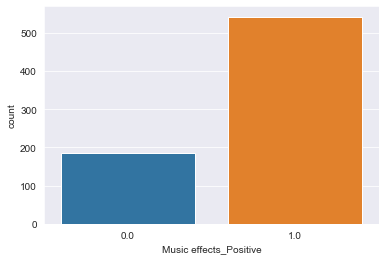

In [25]:
sns.countplot(data=df,x='Music effects_Positive')

<AxesSubplot:xlabel='mental_health_index', ylabel='Music effects_Positive'>

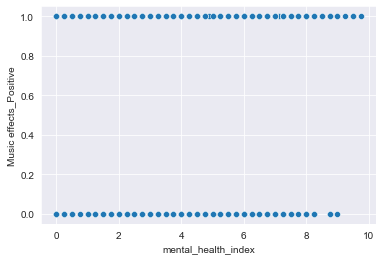

In [26]:
sns.scatterplot(x='mental_health_index',y='Music effects_Positive',data=df)

In [27]:
y, X = dmatrices(" Q('Music effects_Positive') ~ Q('mental_health_index')",
                 data=df[df['Music effects'].notna()], return_type='dataframe')

model = sm.OLS(y, X)
result = model.fit()
print(result.summary())

                                 OLS Regression Results                                
Dep. Variable:     Q('Music effects_Positive')   R-squared:                       0.005
Model:                                     OLS   Adj. R-squared:                  0.003
Method:                          Least Squares   F-statistic:                     3.440
Date:                         Sun, 06 Aug 2023   Prob (F-statistic):             0.0640
Time:                                 16:17:24   Log-Likelihood:                -427.18
No. Observations:                          728   AIC:                             858.4
Df Residuals:                              726   BIC:                             867.5
Df Model:                                    1                                         
Covariance Type:                     nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
---------------------------

Interpretation: Since P> 0.05, there is no significant relationship. Hence we cannot say higher score on mental health would result be more positive music effect

In [28]:
# Logistic regression to predict binary values
from sklearn.model_selection import train_test_split
X=df[df['Music effects'].notna()][['mental_health_index']]
Y=df[df['Music effects'].notna()]['Music effects']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
result = model.fit(X_train, y_train)

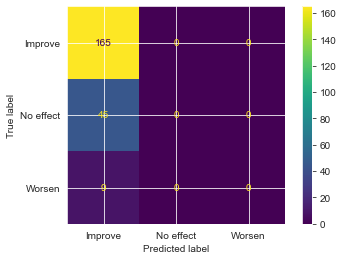

In [29]:
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,plot_confusion_matrix
prediction_test = model.predict(X_test)
accuracy_score(y_test,prediction_test)
#confusion metrix...
confusion_matrix(y_test,prediction_test)
plot_confusion_matrix(model,X_test,y_test)

In [30]:
weights = pd.Series(model.coef_[0],
                 index=X.columns.values)
weights.sort_values()

mental_health_index   -0.024238
dtype: float64

Interpretation: 
- Model has 75% accuracy score, however it's only predicting 1 (positives) and not 0
- Mental_health_index has negative weight -> Higher the mental health index(Ddepression+Anxiety+..) less likley to have a positive music effect


### Hypothesis 4: Increased no. of hours increases anxiety,depression,Insomnia¶

In [31]:
y, X = dmatrices("mental_health_index ~ Q('Hours per day')",
                 data=df[df['Music effects'].notna()], return_type='dataframe')
model = sm.OLS(y, X)
result = model.fit()
print(result.summary())

                             OLS Regression Results                            
Dep. Variable:     mental_health_index   R-squared:                       0.022
Model:                             OLS   Adj. R-squared:                  0.021
Method:                  Least Squares   F-statistic:                     16.54
Date:                 Sun, 06 Aug 2023   Prob (F-statistic):           5.29e-05
Time:                         16:17:39   Log-Likelihood:                -1551.0
No. Observations:                  728   AIC:                             3106.
Df Residuals:                      726   BIC:                             3115.
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              3.8

<AxesSubplot:xlabel='Hours per day', ylabel='mental_health_index'>

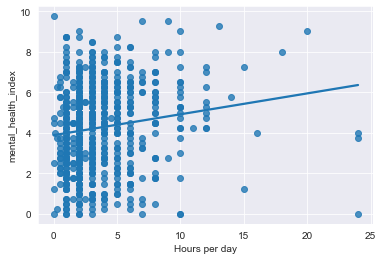

In [33]:
sns.regplot(data=df,x='Hours per day',y='mental_health_index',ci=0)

Interpretation: 
- Since p value is <0.05, relationship between No. of hours and mental_health_index is significant
- one point increase in hours/day on music, increases the anxiety+depression+insomnia+ OCD by 0.1 rating
- Given all coefficients as zero, mental health index is 3.8 on a scale of 10 indicating that there is some level of anxiety,depression,insomnia, OCD even when no time is spent listening to music

#### Hypothesis 5:  Listening to music  has the positive effect on mental health

In [34]:
y, X = dmatrices("Q('Music effects_Positive') ~ Q('Frequency [Classical]_y')+Q('Frequency [Country]_y')+Q('Frequency [EDM]_y')+ Q('Frequency [Folk]_y')+Q('Frequency [Gospel]_y')+Q('Frequency [Hip hop]_y')+ Q('Frequency [Jazz]_y')+Q('Frequency [K pop]_y')+Q('Frequency [Latin]_y')+Q('Frequency [Lofi]_y')+Q('Frequency [Metal]_y')+ Q('Frequency [Frequency [Pop]_y')+Q('Frequency [R&B]_y')+Q('Frequency [Rock]_y')+ Q('Frequency [Video game music]_y')",
                 data=df[df['Music effects'].notna()], return_type='dataframe')
model = sm.OLS(y, X)
result = model.fit()
print(result.summary())

                                 OLS Regression Results                                
Dep. Variable:     Q('Music effects_Positive')   R-squared:                       0.032
Model:                                     OLS   Adj. R-squared:                  0.011
Method:                          Least Squares   F-statistic:                     1.549
Date:                         Sun, 06 Aug 2023   Prob (F-statistic):             0.0827
Time:                                 16:17:55   Log-Likelihood:                -417.21
No. Observations:                          728   AIC:                             866.4
Df Residuals:                              712   BIC:                             939.9
Df Model:                                   15                                         
Covariance Type:                     nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
----------------

Interpretation:

- Since p value is <0.05 for Country Music & R&B Music, relationship between listening to country / R&B Music is significant and has a positive effect on mental health 


## Creating a  classification model to predict the music effect for NAN values in the dataset

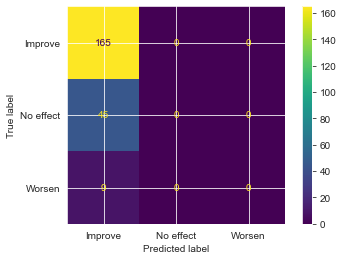

In [35]:
# Predictive model based on classification to predict music effect based on mental health index & frequency of music( most importnat features only)

X=df[df['Music effects'].notna()][['mental_health_index','Frequency [Country]_y','Frequency [R&B]_y']]
Y=df[df['Music effects'].notna()]['Music effects']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

model = LogisticRegression()
result = model.fit(scaled_X_train, y_train)
prediction_test = model.predict(scaled_X_test)
accuracy_score(y_test,prediction_test)
#confusion metrix...
confusion_matrix(y_test,prediction_test)
plot_confusion_matrix(model,X_test,y_test)

In [36]:
accuracy_score(y_test,prediction_test)

0.7534246575342466

In [37]:
weights = pd.Series(model.coef_[0],
                 index=X.columns.values)
weights.sort_values()

mental_health_index     -0.029610
Frequency [Country]_y    0.344677
Frequency [R&B]_y        0.562973
dtype: float64

Country & R&B music has positive weight -> more likely to have a positive music effect

Overall, the logistic model has 75% accuracy score

In [38]:
#Using KNN to build a model with K=1

from sklearn import neighbors
model = neighbors.KNeighborsClassifier(n_neighbors=1,
                                       weights='uniform',
                                       p=2)
result = model.fit(scaled_X_train, y_train)
prediction_test = model.predict(scaled_X_test)
accuracy_score(y_test,prediction_test)

0.6073059360730594

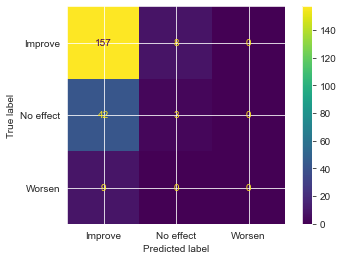

In [39]:
plot_confusion_matrix(model,X_test,y_test)

#Accuracy decreased to 60% compared to logistic model

In [40]:
#With K=2 neighours 
from sklearn import neighbors
KNNmodel = neighbors.KNeighborsClassifier(n_neighbors=2,
                                       weights='uniform',
                                       p=2)
result = KNNmodel.fit(scaled_X_train, y_train)
prediction_test = KNNmodel.predict(scaled_X_test)
accuracy_score(y_test,prediction_test)

0.730593607305936

#Accuracy increased to 73% compared to K=1

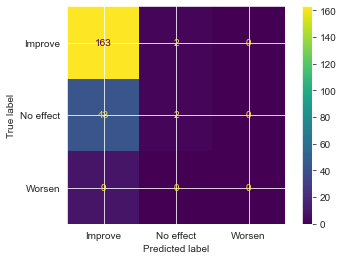

In [41]:
plot_confusion_matrix(KNNmodel,X_test,y_test)

### WE will use KNN model for classification with K=2 since our logistic model is always predictive positive values(baseline accuracy)

In [ ]:
df[df['Music effects'].isna()]

In [42]:
X_new=df[df['Music effects'].isna()][['mental_health_index','Frequency [Classical]_y','Frequency [R&B]_y']]
scaler=StandardScaler()
scaled_X_new = scaler.fit_transform(X_new)
scaled_X_new 
#len(df['Frequency [R&B]_y'])

array([[-0.86198096, -0.8660254 ,  0.63245553],
       [-0.07065418,  1.15470054,  0.63245553],
       [-1.05981266, -0.8660254 ,  0.63245553],
       [ 1.01742015,  1.15470054,  0.63245553],
       [ 1.90766279, -0.8660254 , -1.58113883],
       [-0.56523342, -0.8660254 , -1.58113883],
       [-0.36740172,  1.15470054,  0.63245553]])

In [43]:
prediction_new = KNNmodel.predict(scaled_X_new)
prediction_new

array(['Improve', 'Improve', 'Improve', 'Improve', 'Improve', 'Improve',
       'Improve'], dtype=object)

### our model is predicting "improve" for 8 missing values/new values